<a href="https://colab.research.google.com/github/endlessstory35/google-play-store/blob/main/Copy_of_main_google_play_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **EXPLORATORY DATA ANALYSIS INVOLVED**

>







# **IMPORT OF LIBRARIES AND KNOW  YOUR DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mp
                            


In [ ]:
# load google app review data into dataframe
df = pd.read_csv("/content/Play Store Data.csv")
dfr = pd.read_csv("/content/User Reviews.csv")


In [ ]:
# df.head() will provide us with first five recods of the given data i.e,index(0-4)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# df.tail() provide us five records data from end 
df.tail()

In [ ]:
# Quick information about the google app review data about non null count and data type in column name
df.info()

In [ ]:
# it gives data about count, mean  
df.describe()

In [ ]:
# look for the random 10 records
df.sample(10)


In [ ]:
# for finding what are the types of Category
df['Category'].unique()

In [ ]:
# this gives us about the type of apps available on google apps 
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
# for finding the  type of content rating
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [ ]:
df['Rating'].unique()

In [ ]:
df['Rating'].mode()


0    4.4
dtype: float64

In [ ]:
df['Rating'].median()

4.3

#**DATA CLEANING** 

In [ ]:

# data cleaning of size columm

val = df[df['Size'] == '1,000+'].index
df.drop(axis=0, inplace=True, index=val)


sizes = [i for i in df['Size']]

cleaned_data=[]
def fix_size(sizes_list):
 for size in sizes_list:

    if 'M' in size:

      size=size.replace('M','')
      size = float(size)

    elif 'k' in size:
      size=size.replace('k','')
      size = float(size)
      size = size/1024



    elif  'Varies with device' in size:
      size=float(0) 

    cleaned_data.append(size)  
 return cleaned_data
df['Size'] = fix_size(sizes)
df['Size'] = df['Size'].astype(float)
       



In [ ]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [ ]:
# Review data cleaning
rev= [i for i in df['Reviews']]

def fix_reviews(reviews_list):
    """
    As 'M' has been found the in reviews data, this function
    replace it with million
    """
    cleaned_data = []
    for rev in reviews_list:
        if 'M' in rev:
            rev = rev.replace('M', '')
            rev = float(rev) * 1000000  # 1M = 1,000,000
        cleaned_data.append(rev)
    return cleaned_data

df['Reviews'] = fix_reviews(rev)
df['Reviews'] = df['Reviews'].astype(float)


In [ ]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [ ]:
df['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
# cleaning of price
price = [i for i in df['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

df['Price'] = clean_prices(price)
df['Price'] = df['Price'].astype(float)


In [ ]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4119,F-Secure SAFE,TOOLS,4.3,9433.0,9.3,"500,000+",Free,0.00,Everyone,Tools,"July 30, 2018",17.4.0014017,5.0 and up
5776,Food-Aw - Order Food Online in Aruba,FOOD_AND_DRINK,5.0,1.0,24.0,100+,Free,0.00,Everyone,Food & Drink,"April 5, 2018",10,4.1 and up
5396,Scoompa Video - Slideshow Maker and Video Editor,PHOTOGRAPHY,4.5,559931.0,0.0,"10,000,000+",Free,0.00,Everyone,Photography,"May 10, 2018",Varies with device,Varies with device
7129,CB STARS,FAMILY,NaN,1.0,1.8,10+,Free,0.00,Everyone,Education,"December 30, 2017",1.0,1.6 and up
2956,Photo Collage - InstaMag,PHOTOGRAPHY,4.3,542561.0,46.0,"10,000,000+",Free,0.00,Everyone,Photography,"January 2, 2018",4.7.0,4.0 and up
1537,I will return his eggs,LIBRARIES_AND_DEMO,NaN,91.0,18.0,"100,000+",Free,0.00,Everyone,Libraries & Demo,"November 16, 2017",6.0,2.3 and up
8102,Cy-Fair VFD EMS Protocols,MEDICAL,5.0,2.0,20.0,100+,Free,0.00,Everyone 10+,Medical,"September 21, 2017",1.8.3,4.1 and up
8346,Técnico Legislativo Câmara Legislativa DF,PRODUCTIVITY,NaN,1.0,10.0,10+,Paid,2.99,Everyone,Productivity,"June 29, 2018",6.0,4.0.3 and up
5155,Ah Bailar,FAMILY,NaN,10.0,3.0,100+,Free,0.00,Everyone,Entertainment,"April 14, 2018",1.0,5.0 and up
10007,EW Neuron Scan,TOOLS,NaN,1.0,6.5,10+,Free,0.00,Everyone,Tools,"January 31, 2018",1.6.2,5.0 and up


In [ ]:
#cleaning of Install data 

installs = [i for i in df['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data
        
df['Installs'] = clean_installs(installs)
df['Installs'] = df['Installs'].astype(float)

In [ ]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [ ]:
total1=  df.groupby("Category")['Type'].agg("count").reset_index()
total1

,Category,Type
0,ART_AND_DESIGN,65
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,231
4,BUSINESS,460
5,COMICS,60
6,COMMUNICATION,387
7,DATING,234
8,EDUCATION,156
9,ENTERTAINMENT,149


In [ ]:
# Remove the record where "Type" is null:
index= df[df['Type'].isna()].index

df.drop(axis = 0, inplace = True,index=index)


In [ ]:
# REMOVE THE RECORD WHERE "TYPE" IS "O" BY USING DROP FUNCTION
for x in df.index:
  if df.loc[x, "Type"] == "0":
    df.drop(x, inplace = True)

  

In [ ]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
# check for null values , isna() detects missing values and return boolean values
df.isna().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
df["Rating"].fillna(4.1,inplace = True)


In [ ]:
#df.drop(axis =0,index =10472 ,inplace=True)

In [ ]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
df.dropna(subset = ['Content Rating'], inplace = True)

In [ ]:
print(df['Content Rating'].agg('count'))

10839


In [ ]:
print(df['Content Rating'].unique())

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


# **DATA VISUALIZATION**

#1.  NUMBER OF APPS IN EACH CATEGORY

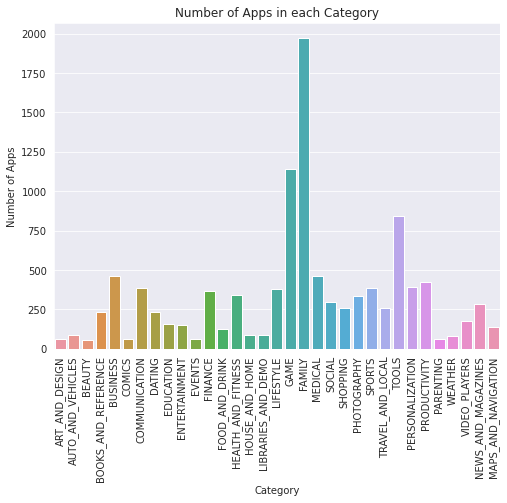

In [ ]:

sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=df)
plt.title('Number of Apps in each Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

In [ ]:
# CORRELATION BETWEEN RATING AND INSTALL
print(df['Rating'].corr(df['Installs']))
print(df['Rating'].corr(df['Size']))
print(df['Rating'].corr(df['Price']))


0.055835348745672066
0.04998834029825421
-0.020835442499074625


# 2. MOST OF THE APPS FALLS UNDER WHICH GENRE

In [ ]:
df['Genres'].unique()

In [ ]:
df['Genres'].value_counts().head(10)

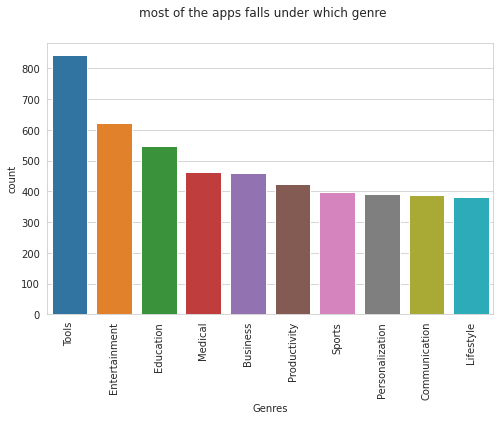

In [ ]:
fig,ax1 = plt.subplots(figsize = (8,5))
plt.suptitle("most of the apps falls under which genre")
plt.xticks(rotation = 90)
sns.countplot( x  = "Genres",data = df,ax = ax1, order = df['Genres'].value_counts().head(10).index)
plt.show()

Here from the above example we saw that most of the apps belongs to "Tools" Genres 

In [ ]:
dfu = df[ df['Reviews'] > 50000].sort_values(by='Reviews')
dfu

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017.0,41.0,1.000000e+06,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
9677,Masha and The Bear Jam Day Match 3 games for kids,FAMILY,4.6,50060.0,98.0,1.000000e+06,Free,0.0,Everyone,Puzzle;Brain Games,"August 7, 2018",1.4.83,4.1 and up
8294,Bokeh (Background defocus),PHOTOGRAPHY,4.0,50109.0,0.0,1.000000e+07,Free,0.0,Everyone,Photography,"June 7, 2018",Varies with device,Varies with device
3098,Fantasy Football,SPORTS,3.5,50179.0,23.0,1.000000e+06,Free,0.0,Everyone,Sports,"August 2, 2018",2.5.7.1,5.0 and up
3046,Fantasy Football,SPORTS,3.5,50179.0,23.0,1.000000e+06,Free,0.0,Everyone,Sports,"August 2, 2018",2.5.7.1,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


# 3. NUMBER OF FREE AND PAID APPS IN EACH CAEGORY

In [ ]:

df2 = pd.DataFrame().assign(Category=df['Category'], Type = df['Type'],Installs=df['Installs'])
print(df2)

In [ ]:
total1=  df.groupby("Category")['Type' ].count().reset_index()
total1

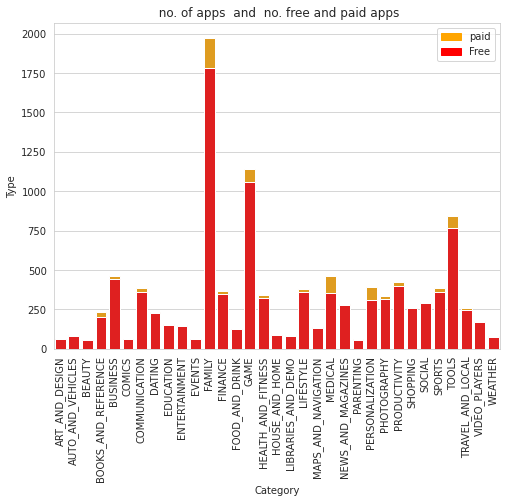

In [ ]:
# 3. PLOT BARPLOT FOR FREE AND PAID APPS
sns.set_style("whitegrid")
total=  df.groupby("Category")['Type'].count().reset_index()
plt.figure(figsize = (8,6))
plt.xticks(rotation =90)

# plot chart for the total apps
sns.set_color_codes('pastel')
c1 = sns.barplot(x = "Category", y = "Type",data = total,color = 'orange')

# create a new data frame for paid 

free_apps = df[df.Type == 'Free']
free = free_apps.groupby('Category').count().reset_index()

# bargraph for free apss
c2 = sns.barplot(x = "Category", y = "Type",data = free,color = 'red')
plt.title("  no. of apps  and  no. free and paid apps ")

#ADD LEGEND
top = mp.Patch(color = "orange", label = "paid")
bot = mp.Patch(color = "red" , label = "Free")
plt.legend(handles = [top, bot])



In [ ]:
"""free_apps = df[df.Type == 'Free']
free =free_apps.groupby('Category').count()['App'].sort_values(ascending = False)"""


In [ ]:
df4 = pd.DataFrame().assign(Rating=df['Rating'],Installs=df['Installs'])
print(df4)

# 4. PERCENTAGE OF FREE AND PAID APPS

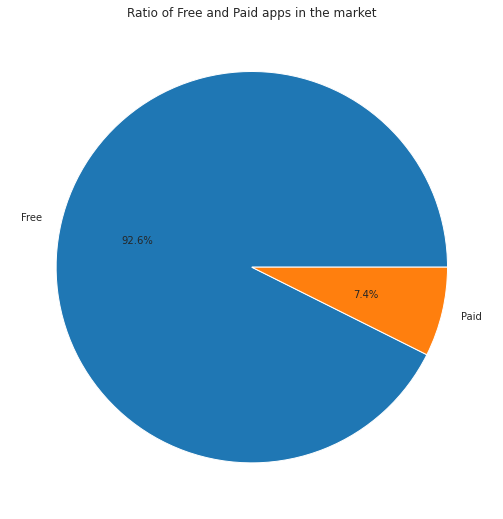

In [ ]:
df.Type.value_counts().plot.pie(y = df.Type, figsize = (9,9), autopct = '%1.1f%%', title = 'Ratio of Free and Paid apps in the market',label = '');

# 5. NUMBER OF APPS INSTALLS IN EACH CATEGORY

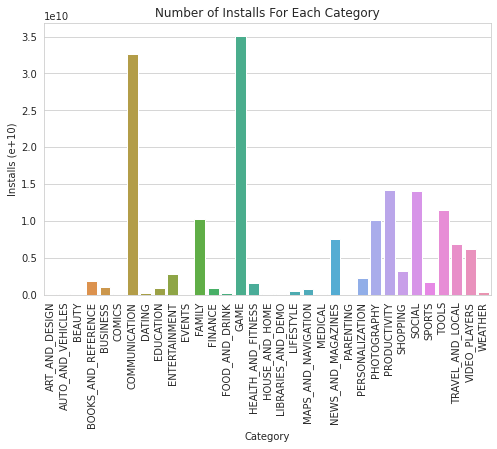

In [ ]:
#2.  get the number of installs for each category
categories = df.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index () # to convert groupby object into dataframe

plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

# 6. DISTRIBUTION OF PAID APPS 

In [ ]:
all_paid = df[df['Type'] == 'Paid']

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Installs'),
 Text(0.5, 1.0, 'Distribution of Installs (paid apps)')]

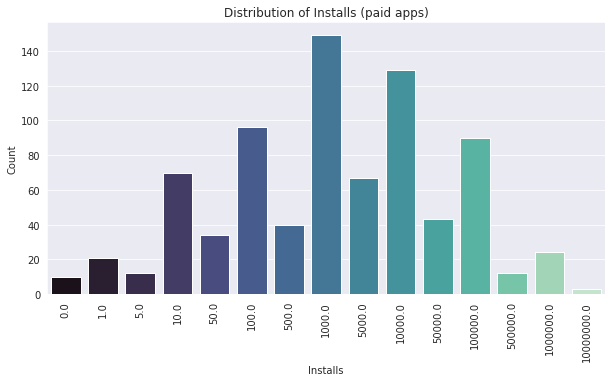

In [ ]:
paid_counts = pd.DataFrame(all_paid['Installs'].value_counts())
plt.figure(figsize=(10, 5))
plt.xticks(rotation = 90)
sns.barplot(x=paid_counts.index, y=paid_counts['Installs'], palette='mako').set(xlabel='Installs', ylabel='Count', title='Distribution of Installs (paid apps)')

# 7. DISTRIBUTION OF FREE APPS

In [ ]:
df = df[df['Installs'] != 'Free']

In [ ]:
all_free = df[df['Type'] == 'Free']

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Installs'),
 Text(0.5, 1.0, 'Distribution of Installs (free apps)')]

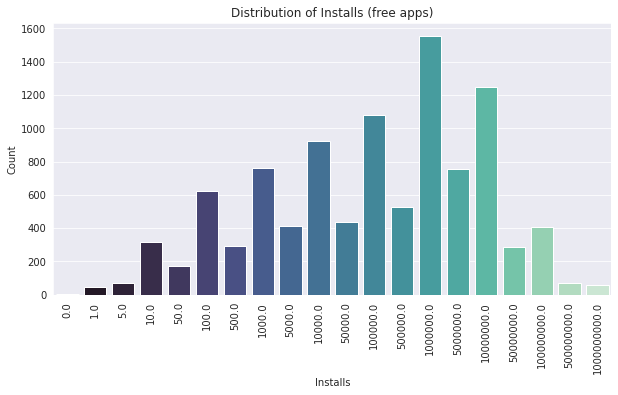

In [ ]:
free_counts = pd.DataFrame(all_free['Installs'].value_counts())
plt.figure(figsize=(10, 5))
plt.xticks(rotation = 90)
sns.barplot(x=free_counts.index, y=free_counts['Installs'], palette='mako').set(xlabel='Installs', ylabel='Count', title='Distribution of Installs (free apps)')

# 8. TOP 10 INSTALLED APP IN SPORTS CATEGORY

In [ ]:
def findtop10incategory(str):
    str = str.upper()
    top10 = df[df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(8,8))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 90, horizontalalignment='right');

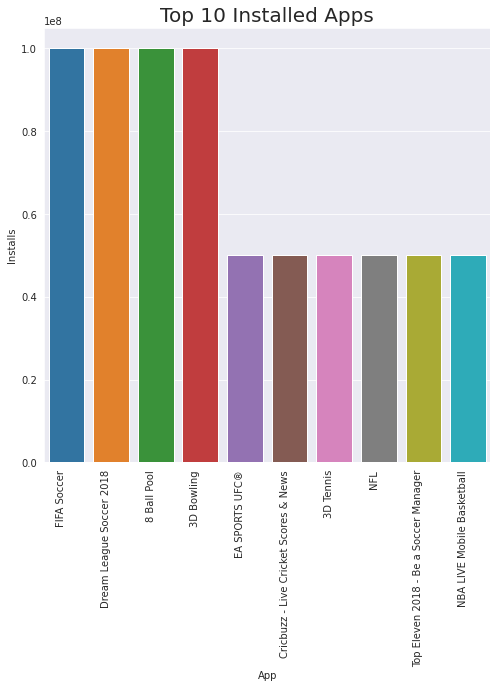

In [ ]:
# bargraph for  top 10 installed apps in sports category
findtop10incategory('Sports')

# 9. TOP 10 PAID APPS

In [ ]:
# top ten paid apps 
top_10_paid_apps = df[df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)
top_10_paid_apps

In [ ]:
top_10_paid_apps = top_10_paid_apps[['App', 'Installs']].drop(9934)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


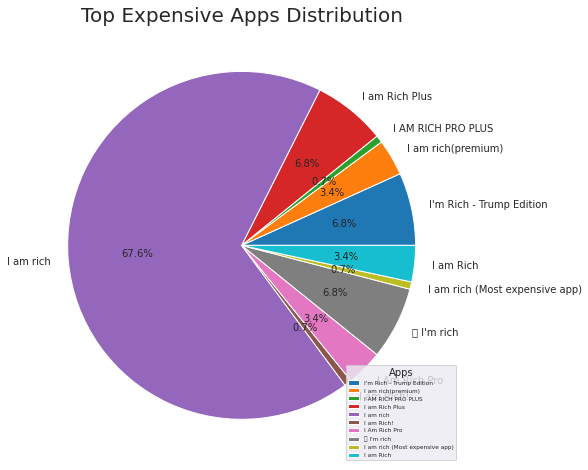

In [ ]:
plt.figure(figsize=(9,8));
plt.pie(top_10_paid_apps.Installs, explode=None, labels=top_10_paid_apps.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top_10_paid_apps.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

# 10.AVERAGE PRICE OF PAID APPS IN EACH CATEGORY

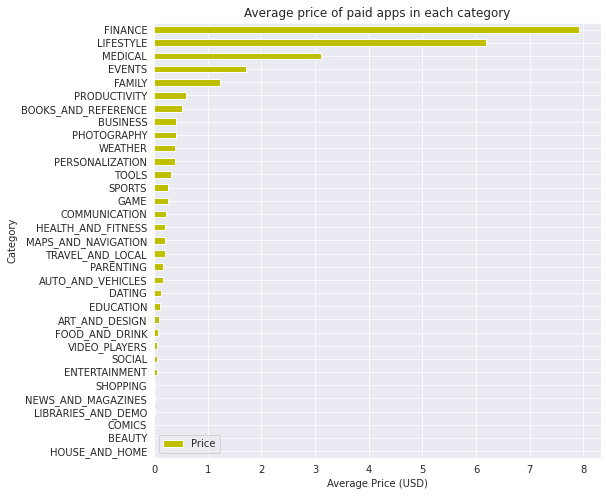

In [ ]:

df.groupby('Category')['Price'].mean().sort_values(ascending=False).plot.barh(figsize = (8,8), color='y').invert_yaxis()
plt.xlabel('Average Price (USD)')
plt.title('Average price of paid apps in each category')
plt.legend()

# 11. TOTAL PRICE IN EACH CATEGORY(SUM)

In [ ]:
# category wise priec:

cat_price = df.groupby('Category')
y=cat_price['Price'].agg(np.sum)
y

Text(0, 0.5, 'Price')

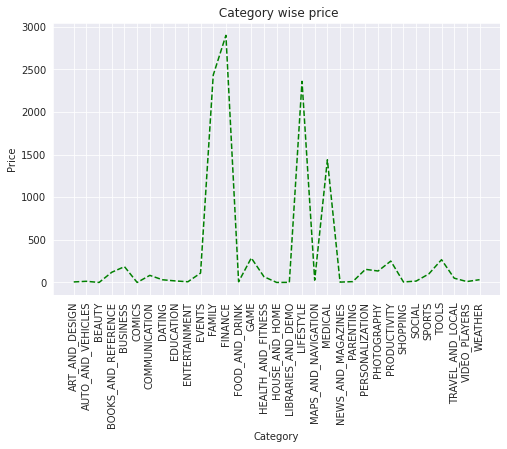

In [ ]:
plt.figure(figsize =(8,5))
plt.plot(y,'r--',color = "green")
plt.xticks(rotation = 90)
plt.title(" Category wise price")
plt.xlabel("Category")
plt.ylabel("Price")

from above figure , we see that "finance" Category has high price as compared to others.


# 12. WHAT IS THE FREE AND PAID APPS SIZE (IN MB)

In [ ]:
df.groupby('Type')['Size'].mean()

Text(0.5, 0, 'TYPE')

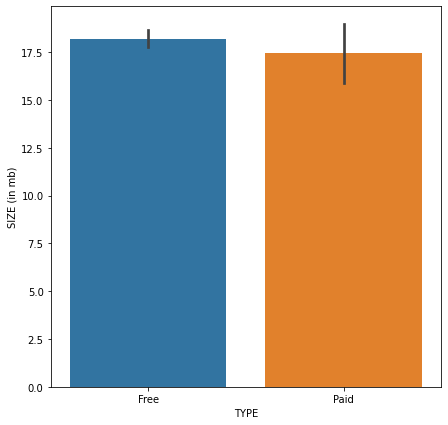

In [ ]:
plt.figure(figsize = (7,7))
sns.barplot(x='Type', y='Size', data=df,estimator=np.mean)
plt.ylabel("SIZE (in mb)")
plt.xlabel("TYPE")

# 13. DATA SHAPE

In [ ]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10839.000000,1.083900e+04,10839.000000,1.083900e+04,10839.000000
mean,4.179288,4.441939e+05,18.153458,1.546577e+07,1.027463
std,0.479960,2.927893e+06,22.171186,8.503315e+07,15.950436
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,2.600000,3.000000e+03,0.000000
50%,4.200000,2.094000e+03,9.200000,1.000000e+05,0.000000
75%,4.500000,5.478300e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


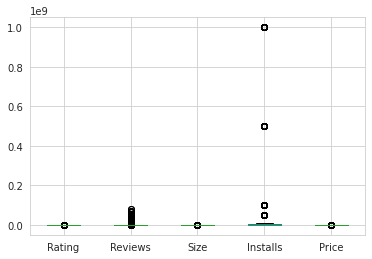

In [ ]:
df.boxplot()

In [ ]:
print(df['Size'].corr(df['Installs']))

-0.00346790732976557


#14. DISTRIBUTION OF RATING

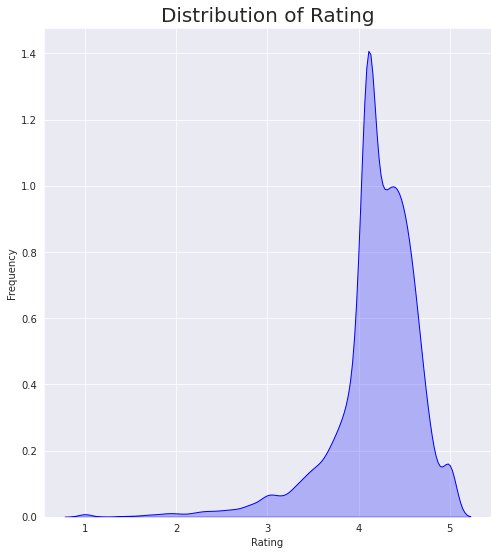

In [ ]:
plt.figure(figsize=(8,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

#15. POINT PLOT OF AVERAGE RATING IN EACH CATEGORY

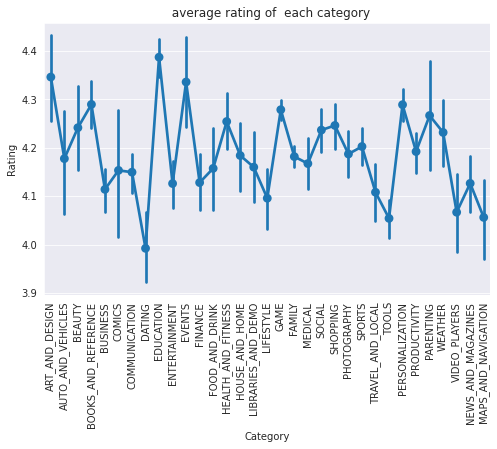

In [ ]:
# plot point plot for average rating of each category

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.title("  average rating of  each category")
sns.pointplot(x = "Category", y = "Rating", data = df)

In [ ]:
dfr.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# 16. COUNTPLOT OF RATING(TOP10)

In [ ]:
df["Rating"].unique()

In [ ]:
df['Rating'].value_counts().head(10)

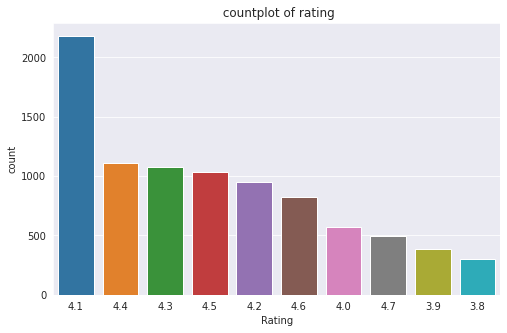

In [ ]:
fig,ax2 = plt.subplots(figsize = (8,5))
sns.set_style("darkgrid")
plt.title(" countplot of rating")
sns.countplot(x = "Rating",data = df,ax = ax2, order = df["Rating"].value_counts().head(10).index)
plt.show()

# 17. PLOT THE BARGRAPH FOR CONTENT RATING

In [ ]:




dft = df['Content Rating'].value_counts()
dft


Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Text(0.5, 1.0, 'Content Rating')

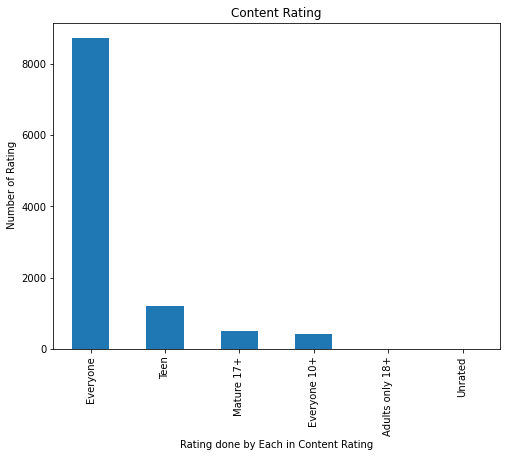

In [ ]:
# plot bargraph for  content raing

plt.figure(figsize = (8,6))
dft.plot(kind="bar")
plt.ylabel(" Number of Rating")
plt.xlabel("Rating done by Each in Content Rating")
plt.title("Content Rating")

# 18.BARPLOT  DISPLAYING THE RATING FOR EACH CONTENT RATING

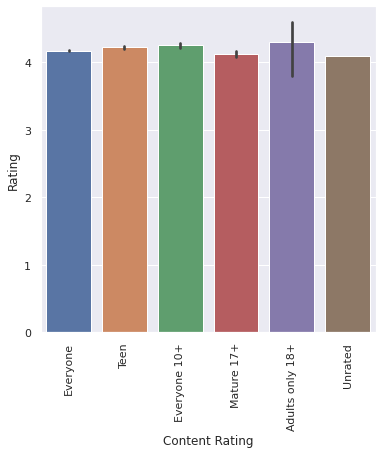

In [ ]:
sns.barplot (x = "Content Rating", y = "Rating",data = df)
plt.xticks(rotation =90)
sns.set(rc = {'figure.figsize':(8,5)})

# 19.PLOTTING THE OVERALL SENTIMENT OF REVIEWS

In [ ]:
dfr['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [ ]:
#removal of null values in sentiment column
dfr.dropna(subset = ['Sentiment'], inplace = True)

In [ ]:
dfr["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [ ]:
dfr1 = dfr['Sentiment'].value_counts()
dfr1

Positive    13052
Negative     4617
Neutral      2709
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


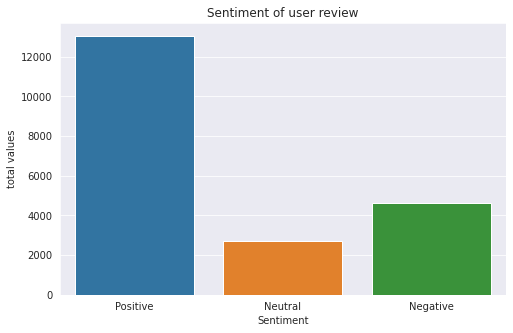

In [ ]:
#sentiment of reviews
plt.figure(figsize=(8, 5))
sns.countplot(dfr['Sentiment'])

plt.title('Sentiment of user review')
plt.ylabel('total values')
plt.show()

## Top 10 earning apps

In [ ]:
Paid_df= df[df['Type'] == 'Paid']

In [ ]:
earn_df = df[['App', 'Installs', 'Price']]
earn_df

In [ ]:
earn_df['Earnings'] = earn_df['Installs'] * earn_df['Price'];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
earn_df_sort_by_Earnings = earn_df.sort_values(by='Earnings', ascending=False).head(50)

In [ ]:
earn_df_sort_by_Price = earn_df_sort_by_Earnings.sort_values(by='Price', ascending=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


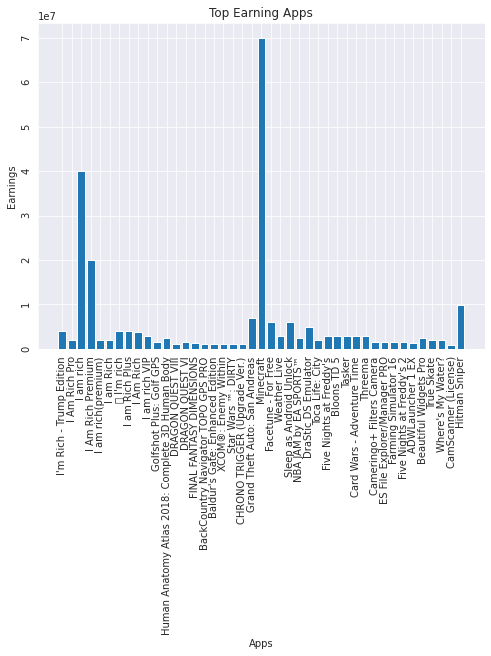

In [ ]:
# plot a bar chart for top 5 earning apps
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
plt.bar(earn_df_sort_by_Price.App, earn_df_sort_by_Price.Earnings, label=earn_df_sort_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

here from the above grpah we can easily see that the top 5 earning apps are:-
1)Minecraft
2)I am rich 
3)I am rich (premium)
4)hitman sniper
5)GTA: sandreas


In [ ]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=True)


#20. TOP APPS HAVING HIGHER NUMBER OF REVIEWS

In [ ]:
# Apps with higheer numbe rof reviews

high_rev_apps = df.sort_values(by='Reviews', ascending=False).head(50)

In [ ]:
high_rev_apps

Text(0.5, 1.0, ' **top apps having higher no. of reviews**')

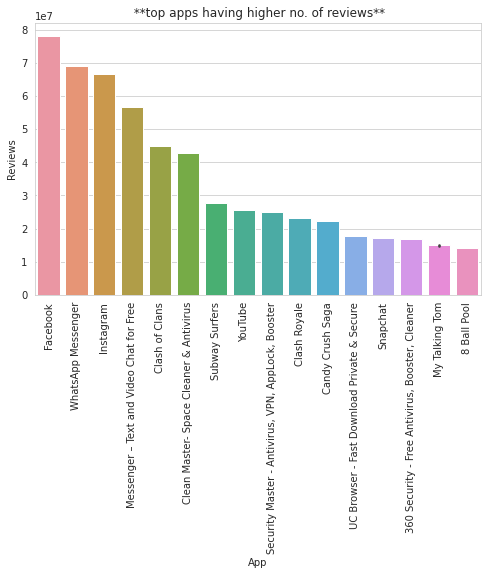

In [ ]:
plt.figure(figsize = (8,5))
sns.set_style("whitegrid")
plt.xticks(rotation = 90)
sns.barplot(x = 'App', y = 'Reviews', data = high_rev_apps)
plt.title(" **top apps having higher no. of reviews**")


#21. PLOTTING OF POSITIVE REVIEWS

In [ ]:

positive_reviews_df = dfr[dfr['Sentiment'] == 'Positive']
positive_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


Text(0.5, 1.0, 'Apps with the highest number of positive reviews')

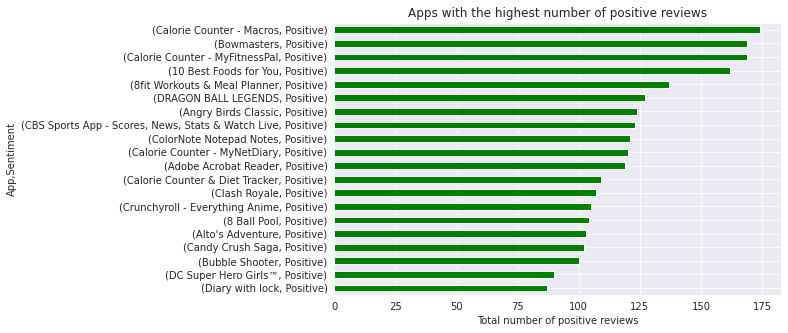

In [ ]:

positive_reviews_df.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(8,5), color='green').invert_yaxis()
plt.xlabel('Total number of positive reviews')
plt.title('Apps with the highest number of positive reviews')

# 22. WORD CLOUD FOR POSITIVE REVIEWS

In [ ]:
from wordcloud import WordCloud, STOPWORDS

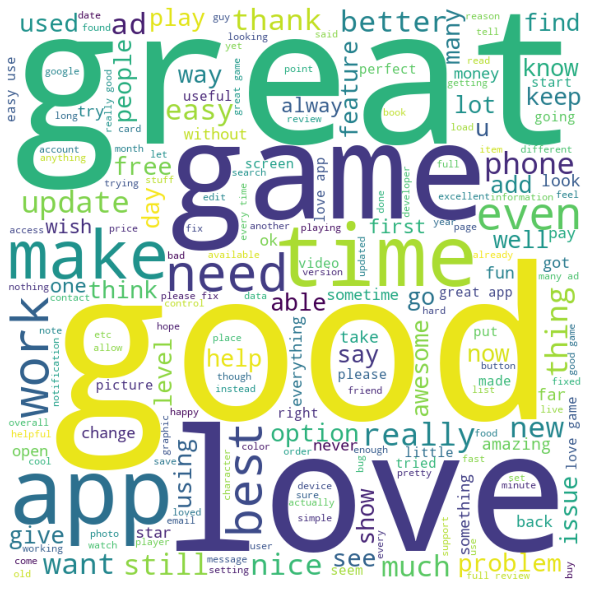

In [ ]:
review_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in positive_reviews_df.Translated_Review.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    review_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# 23. PLOTTING OF NEGATIVE REVIEWS

In [ ]:
negative_reviews_df = dfr[dfr['Sentiment'] == 'Negative']
negative_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


Text(0.5, 1.0, 'Apps with the highest number of negative reviews')

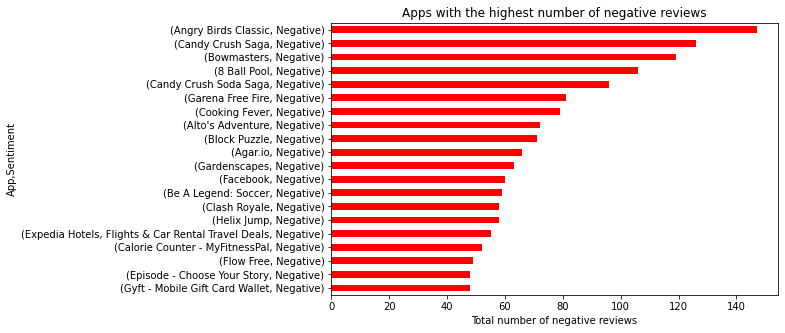

In [ ]:
#plotting of negative reviews
negative_reviews_df.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(8,5), color='red').invert_yaxis()
plt.xlabel('Total number of negative reviews')
plt.title('Apps with the highest number of negative reviews')

# 24. WORD CLOUD OF NEGATIVE REVIEWS


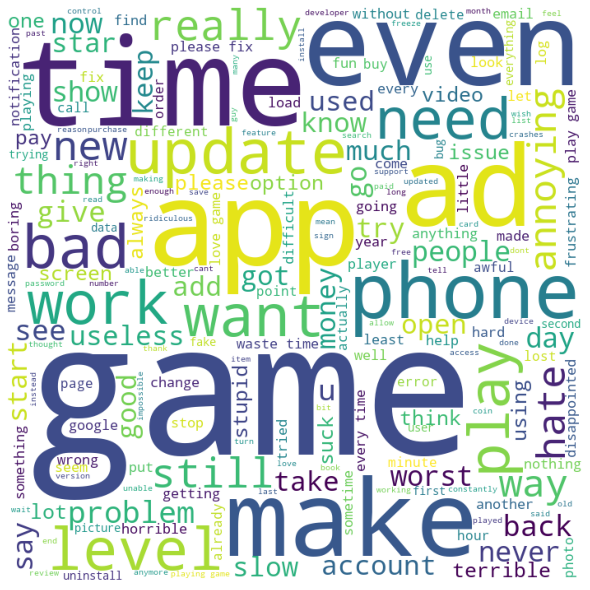

In [ ]:
review_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in negative_reviews_df.Translated_Review.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    review_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# 25. CORELATION BETWEEN RATING,REVIEWS,SIZE AND INSTALLS

In [ ]:
df.loc[0:10842,['Size','Installs']]

,Size,Installs
0,19.0,10000.0
1,14.0,500000.0
2,8.7,5000000.0
3,25.0,50000000.0
4,2.8,100000.0
...,...,...
10836,53.0,5000.0
10837,3.6,100.0
10838,9.5,1000.0
10839,0.0,1000.0


In [ ]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.071814,0.049988,0.055835,-0.020835
Reviews,0.071814,1.000000,0.065450,0.643121,-0.009668
Size,0.049988,0.065450,1.000000,-0.003468,-0.013464
Installs,0.055835,0.643121,-0.003468,1.000000,-0.011691
Price,-0.020835,-0.009668,-0.013464,-0.011691,1.000000


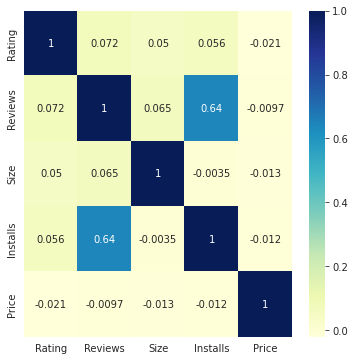

In [ ]:
plt.figure(figsize = (6,6))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
dfy=df.groupby(['Category'])['Rating'].mean()
dfy